<a href="https://colab.research.google.com/github/rezashami/ba-salam-analysis/blob/main/Analysis_Ba_Salam_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'basalam-comments-and-products:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4956094%2F8343753%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240706%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240706T175328Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D66a56e220a82ecef3c7c4ffd2dded8c150c7ce6d72ea63225635f00153addd9b10a61c12441e6a0b48694dbf7b51af593c53d33fa6e5a897f7b587ebe4fef9ae65834a7151534268f0d090f7a83390d6826ed16da4bde2880be853b0f63d155dd2bda26c1b62ce78ac34fd6fed688ed6837806ad4e1c09746cbc01517d7daa1e46f660581776fc7cf447200f3c8e344014ee13a1afe1f4bacea7f3cb13f428403c96e427b3f003660e512405525982b85fa015af2b3ca66b04e64b67fad7b54fde49ac75bb7df4945ff9584d918081e00dc22c7c2360af6216959f22b5e402666a1f77fda4e1d7cd4640654cb62271889a8b00f016ace836346181922396da78'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/basalam-comments-and-products/BaSalam.reviews.csv
/kaggle/input/basalam-comments-and-products/BaSalam.products.csv


In [ ]:
reviews = pd.read_csv('/kaggle/input/basalam-comments-and-products/BaSalam.reviews.csv',encoding='utf-8',low_memory=False)
products = pd.read_csv('/kaggle/input/basalam-comments-and-products/BaSalam.products.csv',encoding='utf-8',low_memory=False)

In [ ]:
print(products.columns)
print(reviews.columns)

Index(['_id', '_score', 'sales_count_week', 'name', 'price', 'status_id',
       'status_title', 'stock', 'photo_MEDIUM', 'photo_SMALL',
       'rating_average', 'rating_count', 'rating_signals', 'primaryPrice',
       'preparationDays', 'weight', 'categoryId', 'has_delivery',
       'has_variation', 'new_categoryId', 'navigation_id', 'vendor_name',
       'vendor_identifier', 'vendor_statusId', 'vendor_freeShippingToIran',
       'vendor_freeShippingToSameCity', 'vendor_cityId', 'vendor_provinceId',
       'vendor_has_delivery', 'vendor_score', 'vendor_id', 'vendor_status_id',
       'vendor_status_title', 'vendor_owner_city', 'vendor_owner_id',
       'isFreeShipping', 'IsAvailable', 'IsSaleable', 'mainAttribute',
       'categoryTitle', 'published', 'video_ORIGINAL', 'promotions'],
      dtype='object')
Index(['_id', 'productId', 'star', 'user_id', 'isPost', 'isPublic', 'id',
       'createdAt', 'updatedAt', 'hashId', 'isPosted', 'isLikedByCurrentUser',
       'isDislikedByCurrentUs

In [ ]:
# An error occured when reading the products data in the 18,35,36,37,38,42 columns.
# These columns have mixed types.
# The suggestion says to use `low_memory=False` arg to prevent the occurrence of the error.
# I try to specify the given columns names.
for i in [18,35,36,37,38,42]:
    print(products.columns[i])

has_variation
isFreeShipping
IsAvailable
IsSaleable
mainAttribute
promotions


# Doing Some Statistical Analysis on the Data.
In the following blocks of codes, I do some statistical analysis for better understanding about the data.

In [ ]:
province_info = products.groupby(['vendor_provinceId','vendor_owner_city']).size().reset_index(name='counts').sort_values('counts',ascending=False)
print(province_info.head(30))

      vendor_provinceId vendor_owner_city  counts
277                10.0             تهران  584584
408                13.0              مشهد  195954
666                21.0                قم  166082
109                 6.0            اصفهان  141791
11                  3.0             تبریز   70817
211                 7.0               کرج   69220
605                19.0             شیراز   62124
1009               33.0               یزد   37514
451                15.0             اهواز   35362
806                27.0               رشت   29631
185                 6.0             کاشان   24585
659                20.0             قزوین   23773
501                16.0             زنجان   23003
749                24.0          کرمانشاه   20855
988                32.0             همدان   20312
910                30.0              اراک   18502
85                  5.0            اردبیل   17502
287                10.0            شهریار   15409
671                22.0              بانه   14774


It is interesting! The capital of Koudrdestan province with code 22 (Sannadaj) has lower salers than the other city like Baneh.

Let see what happens in Kourdestan.

In [ ]:
print(province_info.loc[province_info['vendor_provinceId'] == 22])

     vendor_provinceId vendor_owner_city  counts
671               22.0              بانه   14774
680               22.0             سنندج    6961
679               22.0               سقز    3365
682               22.0            مریوان    2352
681               22.0              قروه    1724
673               22.0             بیجار    1141
675               22.0            دهگلان    1115
684               22.0          کامیاران     638
670               22.0       اورامان تخت     295
676               22.0          دیواندره     193
672               22.0        بلبان آباد      58
677               22.0           سروآباد      42
678               22.0         سریش آباد      35
683               22.0              موچش      20
685               22.0        کانی دینار       7
674               22.0            دلبران       6
686               22.0           یاسوکند       3


As you can see, unlike other provinces the capital of the Kurdistan province has fewer vendors than the Baneh city. The city of Baneh is close to the border and the import and export are booming there. Although other cities like Bandar Genaveh is close to the border, but there are fewer vendors in it.

In [ ]:
print(province_info.loc[province_info['vendor_owner_city'] == 'بندرگناوه'])
print(province_info.loc[province_info['vendor_owner_city'] == 'بانه'])

     vendor_provinceId vendor_owner_city  counts
245                9.0         بندرگناوه    7626
     vendor_provinceId vendor_owner_city  counts
671               22.0              بانه   14774


In [ ]:
from collections import defaultdict
provinces_names = defaultdict(list, [])
province_sale = defaultdict(list, [])
for index, row in province_info.iterrows():
    provinces_names[row['vendor_provinceId']].append(row['vendor_owner_city'])
    province_sale[row['vendor_provinceId']].append(row['counts'])

data = []
for k, v in province_sale.items():
    if k == 22:
        data.append([provinces_names[k][1],int(sum(v))])
        print(f'{provinces_names[k][1]} ({int(k)}) ----> {sum(v)}')
    else:
        data.append([provinces_names[k][0],int(sum(v))])
        print(f'{provinces_names[k][0]} ({int(k)}) ----> {sum(v)}')

تهران (10) ----> 726253
مشهد (13) ----> 243883
قم (21) ----> 167940
اصفهان (6) ----> 242137
تبریز (3) ----> 102657
کرج (7) ----> 95940
شیراز (19) ----> 96151
یزد (33) ----> 45884
اهواز (15) ----> 81179
رشت (27) ----> 65317
قزوین (20) ----> 39512
زنجان (16) ----> 28545
کرمانشاه (24) ----> 30775
همدان (32) ----> 32915
اراک (30) ----> 33883
اردبیل (5) ----> 22736
سنندج (22) ----> 32729
گرگان (26) ----> 25220
ارومیه (4) ----> 42761
بیرجند (12) ----> 30616
ساری (29) ----> 56899
بندرعباس (31) ----> 24925
کرمان (23) ----> 22110
خرم آباد (28) ----> 23809
سمنان (17) ----> 17497
بوشهر (9) ----> 28529
بجنورد (14) ----> 12887
شهرکرد (11) ----> 14769
زاهدان (18) ----> 12387
ایلام (8) ----> 5250
یاسوج (25) ----> 5256


In [ ]:
name_count = np.array(sorted(data,key=lambda x: x[1]))
print(name_count)
print(name_count[:,0])
print(name_count[:,1])

[['ایلام' '5250']
 ['یاسوج' '5256']
 ['زاهدان' '12387']
 ['بجنورد' '12887']
 ['شهرکرد' '14769']
 ['سمنان' '17497']
 ['کرمان' '22110']
 ['اردبیل' '22736']
 ['خرم آباد' '23809']
 ['بندرعباس' '24925']
 ['گرگان' '25220']
 ['بوشهر' '28529']
 ['زنجان' '28545']
 ['بیرجند' '30616']
 ['کرمانشاه' '30775']
 ['سنندج' '32729']
 ['همدان' '32915']
 ['اراک' '33883']
 ['قزوین' '39512']
 ['ارومیه' '42761']
 ['یزد' '45884']
 ['ساری' '56899']
 ['رشت' '65317']
 ['اهواز' '81179']
 ['کرج' '95940']
 ['شیراز' '96151']
 ['تبریز' '102657']
 ['قم' '167940']
 ['اصفهان' '242137']
 ['مشهد' '243883']
 ['تهران' '726253']]
['ایلام' 'یاسوج' 'زاهدان' 'بجنورد' 'شهرکرد' 'سمنان' 'کرمان' 'اردبیل'
 'خرم آباد' 'بندرعباس' 'گرگان' 'بوشهر' 'زنجان' 'بیرجند' 'کرمانشاه' 'سنندج'
 'همدان' 'اراک' 'قزوین' 'ارومیه' 'یزد' 'ساری' 'رشت' 'اهواز' 'کرج' 'شیراز'
 'تبریز' 'قم' 'اصفهان' 'مشهد' 'تهران']
['5250' '5256' '12387' '12887' '14769' '17497' '22110' '22736' '23809'
 '24925' '25220' '28529' '28545' '30616' '30775' '32729' '32915' '33883'
 '

In [ ]:
# It is require to have active Phone number in Kaggle account
!pip3 install arabic-reshaper
!pip install python-bidi

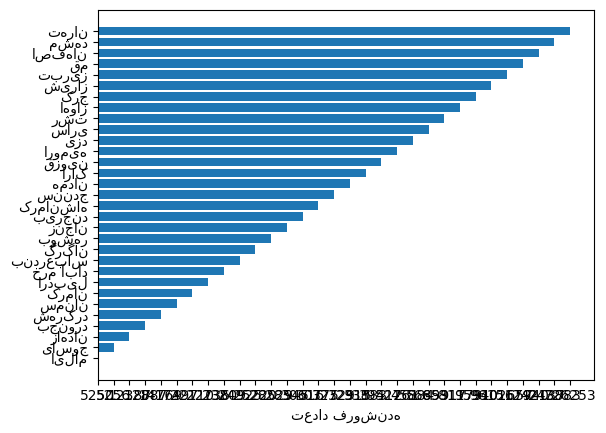

In [ ]:

import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper
def make_farsi_text(x):
    result = []
    for n in x:
        reshaped_text = arabic_reshaper.reshape(n)
        result.append(get_display(reshaped_text))
    return result

from sklearn import preprocessing
fig, ax = plt.subplots()
ax.barh(name_count[:,0], name_count[:,1])
ax.set_yticks(name_count[:,0], labels=make_farsi_text(name_count[:,0]))
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('تعداد فروشنده')
ax.set_title('')
plt.show()

# Check for the `categoryTitle` Column

In [ ]:
category_info = products.groupby(['categoryTitle','price']).size().reset_index(name='counts').sort_values('price',ascending=True)
print(category_info.head(50))
category_info.to_csv('Category.csv', sep=',', encoding='utf-8')

                       categoryTitle    price  counts
378795           پرده و ملزومات پرده  10000.0       3
110053                     جعبه هدیه  10000.0      14
299714              لوازم دانش آموزی  10000.0      17
403255              کاغذ و پاکت کادو  10000.0      14
1216                          آبرسان  10000.0       2
106038         جاباتری و شارژر باتری  10000.0       1
105751               تیغه برف پاک کن  10000.0       1
298668                   لوازم خیاطی  10000.0      68
104197        تیشرت و پولوشرت مردانه  10000.0       8
43344                اکسسوری دخترانه  10000.0       9
303046           لوازم رزین و ویترای  10000.0      13
304852                لوازم شمع سازی  10000.0       1
305481         لوازم مذهبی و عزاداری  10000.0      26
453092                        گلدوزی  10000.0       1
306514                  لوازم مهمانی  10000.0      13
300649                 لوازم دستشویی  10000.0       3
296315                    لوازم حمام  10000.0       1
416645                   کرم

These results show that the price on the Ba Salam platform is very diverse and it is not possible to gain additional knowledge about the price of goods with this data.